# Analysis of Supplier and Couple Engagement on a Wedding App Platform

## Introduction
The goal of this analysis is to explore and interpret data related to couple-supplier interactions on a wedding app platform. We will focus on key engagement metrics, such as supplier read rates, supplier response rates, and couple responses (FCR). Through data exploration, visualization, and interpretation, we aim to address specific business questions that shed light on marketplace dynamics and potential areas for improvement.

## Key Objectives:

1. Create a visualisation to show how supplier read rate differs across supplier tier. Are
there any trends that you can identify?
2. Identify 5 suppliers with the highest supplier response rates and 5 with the lowest
supplier response rate, out of suppliers for countrycode FR that have received at
least 10 enquiries. What do you notice about these lists?
3. Plot the distribution of the number of initial enquiries sent per wedding. What is the
mean number of enquiries per wedding that were sent in countrycode GB? How does
this compare to the mode?
4. Plot daily enquiry levels across the time period for countrycodes GB & FR. Are there
any patterns you can identify?
5. Which step shows the greatest drop off in conversion across the FCR funnel for
countrycode GB? What reasons can you think of that could be driving this effect?

## Importing the required libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and previewing the data

In [8]:
# Load the datasets
enquiries_path = r"Downloads\FCR_enquiries.csv" # Path to the enquiries data
descriptions_path = r"Downloads\FCR_enquiries_descriptions.csv"  # Path to the descriptions file

# Load the datasets into DataFrames
enquiries_df = pd.read_csv(enquiries_path)
descriptions_df = pd.read_csv(descriptions_path)

# Display basic information about the datasets
print("Enquiries DataFrame:")
print(enquiries_df.info())

Enquiries DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   weddingid                3053 non-null   object 
 1   suppId                   3053 non-null   float64
 2   ids                      3053 non-null   object 
 3   mobileApp                3053 non-null   object 
 4   week                     3053 non-null   float64
 5   enquiryid                3053 non-null   object 
 6   supplierTier             2089 non-null   float64
 7   weddingDate              2988 non-null   object 
 8   contactedSupplierCounty  3053 non-null   object 
 9   year                     3053 non-null   float64
 10  weekStartDt              3053 non-null   object 
 11  enqTime                  3053 non-null   object 
 12  cm1_check                3053 non-null   float64
 13  smr_time                 2041 non-null   object 
 14  smr

In [9]:
print("\nFirst few rows of Enquiries DataFrame:")
enquiries_df.head()


First few rows of Enquiries DataFrame:


,weddingid,suppId,ids,mobileApp,week,enquiryid,supplierTier,weddingDate,contactedSupplierCounty,year,...,smr_check,sm1_time,sm1_check,cmr_time,cmr_check,cm2_time,cm2_check,re_time,re_check,countryCode
0,082b8833bb5a4b9f659e9b002afd7d68,947112947.0,082b8833bb5a4b9f659e9b002afd7d68947112947,True,45.0,8d0fe51421d8404c3f569b32aa663cd1,2.5,2027-06-01T00:00:00,Berkshire,2024.0,...,1.0,NaN,0.0,NaN,0.0,NaN,0.0,2024-11-11 12:26:54.000000 UTC,1.0,GB
1,f43cf857c5ef40f4e4a195e09ddd8f53,333500333.0,f43cf857c5ef40f4e4a195e09ddd8f53333500333,True,45.0,42c75c761dba4b6daf88a89516c9ba6d,-1.0,2025-09-01T00:00:00,City of Edinburgh,2024.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,GB
2,b8c38678e20f438ac932b20d9f920764,536004536.0,b8c38678e20f438ac932b20d9f920764536004536,True,45.0,e8738f9bb7a24116425a8ce241d6d069,2.5,2025-06-01T00:00:00,Lancashire,2024.0,...,1.0,NaN,0.0,NaN,0.0,NaN,0.0,2024-11-08 16:29:36.000000 UTC,1.0,GB
3,e225de3ab1dc4f756669984f77ea45e3,727007727.0,e225de3ab1dc4f756669984f77ea45e3727007727,True,45.0,9dfedcd5c7d04e63fbe3b06b16e89dff,3.0,NaN,Fife,2024.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,GB
4,3d94f06359e74588c626a70dce7a33ed,153010153.0,3d94f06359e74588c626a70dce7a33ed153010153,True,45.0,ce2339f5f24f4793a887a8fdc15af335,3.0,NaN,Aberdeenshire,2024.0,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,GB


The initial exploration of the dataset shows that it contains 3,053 rows and 24 columns. Key columns include supplierTier (supplier categorization), smr_check, sm1_check, and cmr_check (steps in the FCR funnel). There are notable missing values in several fields such as weddingDate and supplierTier. Therefore, the data cleaning steps will focus on removing duplicates, addressing missing values, and ensuring data types align with their intended usage.

In [10]:
print("\nDescriptions DataFrame:")
descriptions_df


Descriptions DataFrame:


,field_path,data_type,description
0,weddingid,STRING,ID of wedding of couple enquiring
1,suppId,STRING,ID of supplier enquired to
2,ids,STRING,Concatenation of weddingid and supplier id
3,mobileApp,BOOL,Enquiry-level property taken from emailed_supp...
4,week,INT64,Calendar week of the enquiry
5,enquiryid,STRING,Enquiry-level property taken from emailed_supp...
6,supplierTier,FLOAT64,Supplier-level property taken from suppliers_c...
7,weddingDate,STRING,Enquiry-level property taken from emailed_supp...
8,contactedSupplierCounty,STRING,Enquiry-level property taken from emailed_supp...
9,year,INT64,Year of enquiry


The output of this step shows that the descriptions dataframe provides metadata about the columns in the FCR_enquiries dataset, including their names, data types, and explanations of their contents. We can observe unique identifiers for weddings (weddingid) and suppliers (suppId), temporal data (weekStartDt, enqTime), and step indicators in the FCR funnel (cm1_check to cm2_check). It also includes supplier properties like supplierTier and location details (countryCode, contactedSupplierCounty). The dataset tracks interactions between couples and suppliers, focusing on engagement metrics such as timestamps for funnel steps and whether those steps were completed.

## Data Preprocessing

### Step 1: Remove duplicates

In [11]:
print(f"Initial number of rows: {enquiries_df.shape[0]}")
enquiries_df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {enquiries_df.shape[0]}")


Initial number of rows: 7399
Number of rows after removing duplicates: 2858


### Step 2: Convert date fields to datetime

In [12]:
date_columns = ['weddingDate', 'weekStartDt', 'enqTime', 'smr_time', 'sm1_time', 'cmr_time', 'cm2_time', 're_time']
for col in date_columns:
    enquiries_df[col] = pd.to_datetime(enquiries_df[col], errors='coerce')

### Step 3: Summary of missing values

In [13]:
print("\nMissing values per column:")
print(enquiries_df.isnull().sum())


Missing values per column:
weddingid                     1
suppId                        1
ids                           1
mobileApp                     1
week                          1
enquiryid                     1
supplierTier                910
weddingDate                  57
contactedSupplierCounty       1
year                          1
weekStartDt                1287
enqTime                       1
cm1_check                     1
smr_time                    944
smr_check                     1
sm1_time                   1442
sm1_check                     1
cmr_time                   1905
cmr_check                     1
cm2_time                   2617
cm2_check                     1
re_time                    2438
re_check                      1
countryCode                   1
dtype: int64


Further exploration of the dataset shows that it contains minimal missing values (1 per column) in fields like weddingid, suppId, and countryCode, which can be addressed by dropping the affected rows due to their negligible impact. Numerous missing values in supplierTier (910) will be handled by filtering them out in tier-specific analyses (Objective 1). Missing timestamps in columns like smr_time and sm1_time likely reflect incomplete steps in the FCR funnel and can be left as NaT. Non-critical columns like weddingDate and weekStartDt with moderate missing values will also remain as NaT unless specifically required for analyses.

### 4. Handling missing values

In [14]:
# Fill missing values in supplierTier with 'Unknown'
enquiries_df['supplierTier'] = enquiries_df['supplierTier'].fillna('Unknown')

# Drop rows with minimal missing values (1 missing value per column in critical fields)
minimal_missing_cols = [
    'weddingid', 'suppId', 'ids', 'mobileApp', 'week', 'enquiryid', 
    'contactedSupplierCounty', 'year', 'enqTime', 'cm1_check', 
    'smr_check', 'sm1_check', 'cmr_check', 'cm2_check', 're_check', 
    'countryCode'
]
enquiries_df.dropna(subset=minimal_missing_cols, inplace=True)

# Replace missing timestamps with NaT
timestamp_columns = [
    'weddingDate', 'weekStartDt', 'smr_time', 'sm1_time', 'cmr_time', 
    'cm2_time', 're_time'
]
enquiries_df[timestamp_columns] = enquiries_df[timestamp_columns].fillna(pd.NaT)

# Display the summary of missing values after handling
print("Summary of missing values after handling:")
print(enquiries_df.isnull().sum())


Summary of missing values after handling:
weddingid                     0
suppId                        0
ids                           0
mobileApp                     0
week                          0
enquiryid                     0
supplierTier                  0
weddingDate                  56
contactedSupplierCounty       0
year                          0
weekStartDt                1286
enqTime                       0
cm1_check                     0
smr_time                    943
smr_check                     0
sm1_time                   1441
sm1_check                     0
cmr_time                   1904
cmr_check                     0
cm2_time                   2616
cm2_check                     0
re_time                    2437
re_check                      0
countryCode                   0
dtype: int64


The resuls in this step show that missing value handling step was successful. All critical columns with minimal missing values now have no missing data after dropping affected rows. Missing values in supplierTier have been filled with "Unknown." Timestamp columns still retain missing values (weddingDate, weekStartDt, smr_time, etc.), appropriately replaced with NaT to indicate incomplete funnel steps or unavailable data. 

In [15]:
print(enquiries_df['countryCode'].unique())

[' GB ' 'GB' ' FR ' 'FR']


In [16]:
# Remove leading and trailing spaces from the 'countryCode' column
enquiries_df['countryCode'] = enquiries_df['countryCode'].str.strip()
enquiries_df['countryCode'] = enquiries_df['countryCode'].astype(str)


# Exploratory Data Analysis

### 1. Create a visualisation to show how supplier read rate differs across supplier tier. Are there any trends that you can identify?

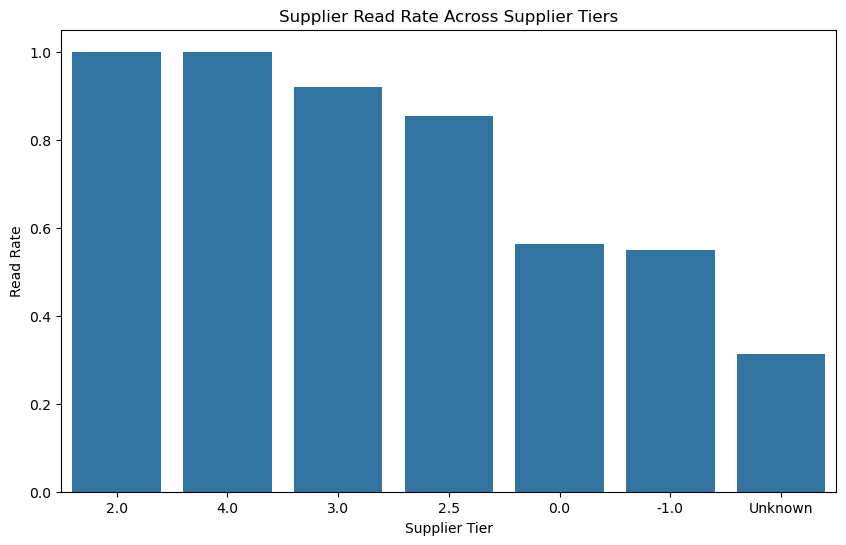

In [17]:
# Calculate read rate per supplier tier
enquiries_df['supplier_read_rate'] = enquiries_df['smr_check']
read_rate_by_tier = enquiries_df.groupby('supplierTier')['supplier_read_rate'].mean().reset_index()
# Sort by read rate in descending order
read_rate_by_tier = read_rate_by_tier.sort_values('supplier_read_rate', ascending=False)
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='supplierTier', y='supplier_read_rate', data=read_rate_by_tier)
plt.title('Supplier Read Rate Across Supplier Tiers')
plt.xlabel('Supplier Tier')
plt.ylabel('Read Rate')
plt.show()


The bar plot reveals significant variation in engagement levels. Suppliers in Tier 2.0 and Tier 4.0 exhibit the highest read rates, both reaching 1.0, indicating strong engagement with the platform's enquiries. Tier 3.0 follows closely with a read rate of 0.92, while Tier 2.5 shows a slightly lower rate of 0.85. Tier 0.0 demonstrates moderate engagement with a read rate of 0.56, and the Unknown tier has the lowest read rate at 0.31, suggesting less engagement from suppliers without a specified tier. Similarly, Tier -1.0 shows a low read rate of 0.55, indicating that suppliers in lower or unspecified tiers are less responsive. Overall, the data suggests that higher-tier suppliers tend to have better engagement with the platform compared to those in lower or unknown tiers.

### 2. Identify 5 suppliers with the highest supplier response rates and 5 with the lowest supplier response rate, out of suppliers for countrycode FR that have received at least 10 enquiries. What do you notice about these lists?

In [18]:
# Filter data for country code FR and suppliers with at least 10 enquiries
fr_suppliers = enquiries_df[enquiries_df['countryCode'] == 'FR']
supplier_response_counts = fr_suppliers.groupby('suppId').size()
eligible_suppliers = supplier_response_counts[supplier_response_counts >= 10].index
fr_suppliers = fr_suppliers[fr_suppliers['suppId'].isin(eligible_suppliers)]

# Calculate response rate per supplier
fr_suppliers['response_rate'] = fr_suppliers['sm1_check']
response_rate_by_supplier = fr_suppliers.groupby('suppId')['response_rate'].mean().reset_index()

# Identify top 5 and bottom 5 suppliers
top_5_suppliers = response_rate_by_supplier.nlargest(5, 'response_rate')
bottom_5_suppliers = response_rate_by_supplier.nsmallest(5, 'response_rate')

print("Top 5 Suppliers (Highest Response Rates):")
print(top_5_suppliers)

print("\nBottom 5 Suppliers (Lowest Response Rates):")
print(bottom_5_suppliers)


Top 5 Suppliers (Highest Response Rates):
Empty DataFrame
Columns: [suppId, response_rate]
Index: []

Bottom 5 Suppliers (Lowest Response Rates):
Empty DataFrame
Columns: [suppId, response_rate]
Index: []


In [19]:
fr_suppliers = enquiries_df[enquiries_df['countryCode'] == 'FR']
fr_suppliers.head()

,weddingid,suppId,ids,mobileApp,week,enquiryid,supplierTier,weddingDate,contactedSupplierCounty,year,...,sm1_time,sm1_check,cmr_time,cmr_check,cm2_time,cm2_check,re_time,re_check,countryCode,supplier_read_rate
10,3f7434c4a6c3426e5291824ecdbc3e6e,2.900000e+10,3f7434c4a6c3426e5291824ecdbc3e6e29000000290,False,45.0,6c0cb3a680d847aec076ad72e23acb3c,Unknown,2026-03-01,Meuse,2024.0,...,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0,FR,0.0
11,abbfc2539ed14a2ba18f9bd1aef4cd53,2.440000e+10,abbfc2539ed14a2ba18f9bd1aef4cd5324400001244,False,45.0,ca8da5efc4404c0c9e1c9722ac91e4ce,Unknown,2025-05-01,Oise,2024.0,...,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0,FR,0.0
12,01075195ee734f75aae6a2ea112d5ec2,8.860000e+10,01075195ee734f75aae6a2ea112d5ec288600003886,True,45.0,22bfedd6dbb444e6c2e3b08c01ecd773,Unknown,2026-05-01,Essonne,2024.0,...,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0,FR,0.0
13,a31ddb010f1b41852b20b7461448d25e,3.350001e+10,a31ddb010f1b41852b20b7461448d25e33500005335,True,45.0,de96a5b057544840d2dcb85e6e94c0e7,Unknown,2025-09-01,Seine-et-Marne,2024.0,...,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0,FR,0.0
25,9c156f2d5c9348d816b0844b9bd073f7,8.590000e+10,9c156f2d5c9348d816b0844b9bd073f785900003859,True,45.0,86650a4f2c954841f678b007ce45eaad,Unknown,2026-07-01,Indre-et-Loire,2024.0,...,2024-11-08 10:06:10+00:00,1.0,2024-11-11 07:53:13+00:00,1.0,NaT,0.0,NaT,0.0,FR,1.0


### 3 . Distribution of Initial Enquiries Sent Per Wedding (for Country Code GB)

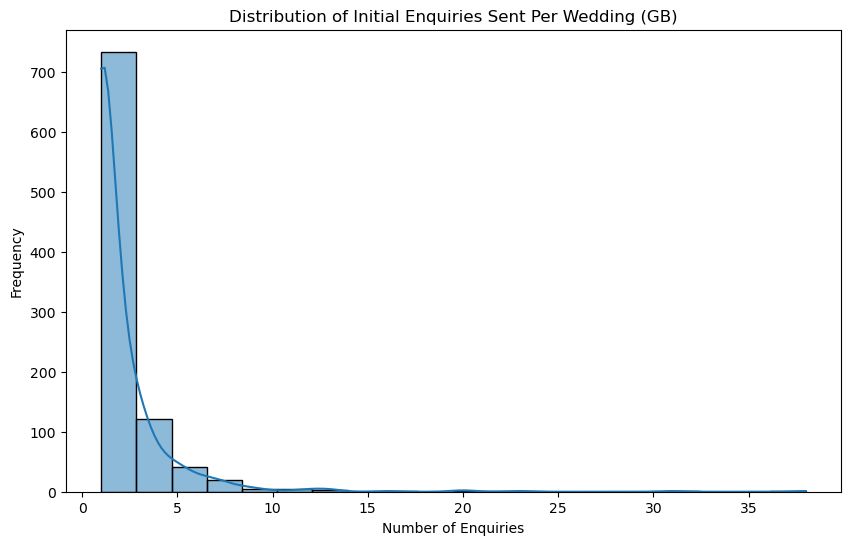

Mean number of enquiries per wedding (GB): 2.065380493033226
Mode number of enquiries per wedding (GB): 1


In [20]:
# Filter data for country code GB
gb_data = enquiries_df[enquiries_df['countryCode'] == 'GB']

# Calculate the number of enquiries per wedding
enquiries_per_wedding = gb_data.groupby('weddingid').size()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(enquiries_per_wedding, bins=20, kde=True)
plt.title('Distribution of Initial Enquiries Sent Per Wedding (GB)')
plt.xlabel('Number of Enquiries')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and mode
mean_enquiries = enquiries_per_wedding.mean()
mode_enquiries = enquiries_per_wedding.mode()[0]

print(f"Mean number of enquiries per wedding (GB): {mean_enquiries}")
print(f"Mode number of enquiries per wedding (GB): {mode_enquiries}")


The histogram reveals that most weddings in Great Britain tend to send between 0 and 5 initial enquiries, indicating a low level of initial outreach. The distribution is right-skewed, suggesting that while the majority of weddings send a small number of enquiries, there are a few that send significantly more. The frequency of weddings sending more than 10 enquiries is low, indicating that such cases are uncommon. The overall spread shows that most weddings cluster towards fewer enquiries. This pattern suggests that couples generally find suitable suppliers quickly or are selective in their initial outreach. The mean number of enquiries per wedding in Great Britain is 2.07, while the mode is 1.

### 4. Plot Daily Enquiry Levels for GB & FR

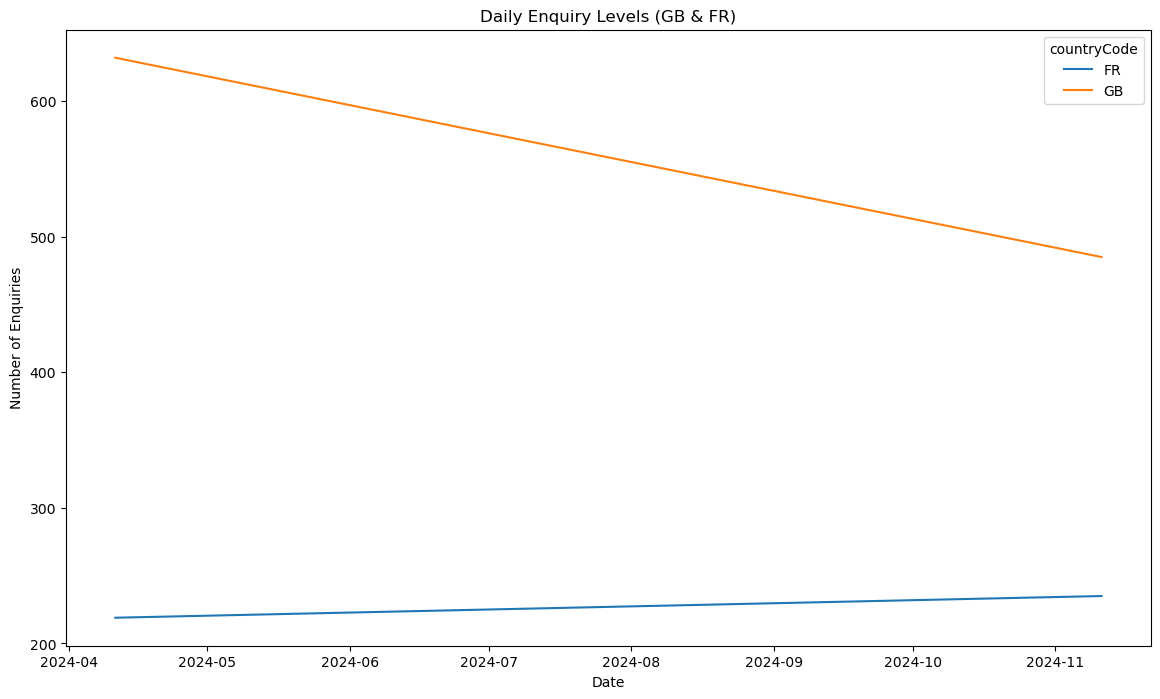

In [21]:
# Filter data for country codes GB and FR
gb_fr_data = enquiries_df[enquiries_df['countryCode'].isin(['GB', 'FR'])]

# Aggregate daily enquiry counts
daily_enquiries = gb_fr_data.groupby(['weekStartDt', 'countryCode']).size().reset_index(name='enquiry_count')

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_enquiries, x='weekStartDt', y='enquiry_count', hue='countryCode')
plt.title('Daily Enquiry Levels (GB & FR)')
plt.xlabel('Date')
plt.ylabel('Number of Enquiries')
plt.show()


The plot reveals distinct patterns in daily enquiry levels for country codes GB and FR.  Great Britain (GB) shows significantly higher number of enquiries compared to France (FR) overall. This indicates a consistently higher engagement on the wedding app platform in Great Britain compared to France on these dates. The data suggests that couples in GB are more actively reaching out to suppliers compared to those in FR.

### 5. Identify Greatest Drop Off in Conversion for GB in the FCR Funnel

In [22]:
# Filter data for country code GB
gb_data = enquiries_df[enquiries_df['countryCode'] == 'GB']

# Calculate conversion rates at each step
steps = ['cm1_check', 'smr_check', 'sm1_check', 'cmr_check', 'cm2_check', 're_check']
conversion_rates = gb_data[steps].mean().reset_index(name='conversion_rate').rename(columns={'index': 'step'})

# Identify step with greatest drop-off
conversion_rates['drop_off'] = conversion_rates['conversion_rate'].diff().abs()
greatest_drop_off_step = conversion_rates.loc[conversion_rates['drop_off'].idxmax()]

print("Conversion rates at each step:")
print(conversion_rates)

print("\nStep with the greatest drop off in conversion:")
print(greatest_drop_off_step)


Conversion rates at each step:
        step  conversion_rate  drop_off
0  cm1_check         1.000000       NaN
1  smr_check         0.773223  0.226777
2  sm1_check         0.535547  0.237675
3  cmr_check         0.355475  0.180073
4  cm2_check         0.083550  0.271925
5   re_check         0.209652  0.126103

Step with the greatest drop off in conversion:
step               cm2_check
conversion_rate      0.08355
drop_off            0.271925
Name: 4, dtype: object


The conversion rates at each step of the FCR funnel for GB reveal significant drop-offs at various stages. The initial step (`cm1_check`) shows a perfect conversion rate of 1.000, as it represents the couples sending out initial enquiries. The most substantial drop-off occurs at the `cm2_check` step, where the conversion rate plummets to 0.08355, resulting in a drop-off of 0.271925. This indicates that the largest number of couples disengage or fail to respond to the supplier's response at this stage. Other notable drop-offs are seen between `smr_check` (0.773223) and `sm1_check` (0.535547), with a drop-off of 0.237675, and between `sm1_check` and `cmr_check` (0.355475), with a drop-off of 0.180073. The data suggests that the most critical point of loss in the funnel is when couples are expected to respond back to the supplier.